In [2]:
import numpy as np
import pandas as pd
import random
import pylab
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
def compute_cost_function(m, t0, t1, x, y):
  return 1/2/m * sum([(t0 + t1* np.asarray([x[i]]) - y[i])**2 for i in range(m)])

In [34]:
costarr=[]
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=1000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = 20
    t1 = 1

    # total error, J(theta)
    J = compute_cost_function(m, t0, t1, x, y)
    print('J=', J);
    # Iterate Loop
    num_iter = 0
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i])*np.asarray([x[i]]) for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = compute_cost_function(m, t0, t1, x, y)
        
        print ('J = ', e)
        if(abs(e-J)<ep):
            print("Reached convergence")
            converged=True
            costarr.append(e)
        elif iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True
            costarr.append(e)
        J = e   # update error 
        iter += 1  # update iter
    
            
            

    return t0,t1

In [35]:
if __name__ == '__main__':
  
    df = pd.read_csv('6.txt', names=['x','y'])
    x = df['x']
    y = df['y']
     
    alphaa=[0.0001,0.0003,0.0005,0.001,0.003,0.005,0.01,0.03,0.05,0.08]
#     alpha = 0.06 # learning rate
    ep = 0.0001 # convergence criteria

    for i in alphaa:
    # call gradient decent, and get intercept(=theta0) and slope(=theta1)
        theta0, theta1 = gradient_descent(i, x, y, ep, max_iter=50)
        print ('theta0 = ' + str(theta0)+' theta1 = '+str(theta1))
    #plot_cost_function(x, y, x.shape[0])

    print(costarr)
    
    
    #training and testing set with error 

J= [3.19938761]
J =  [3.19660541]
J =  [3.19383949]
J =  [3.19108975]
J =  [3.18835609]
J =  [3.18563842]
J =  [3.18293665]
J =  [3.18025068]
J =  [3.17758042]
J =  [3.17492578]
J =  [3.17228667]
J =  [3.169663]
J =  [3.16705467]
J =  [3.1644616]
J =  [3.16188369]
J =  [3.15932087]
J =  [3.15677303]
J =  [3.1542401]
J =  [3.15172198]
J =  [3.1492186]
J =  [3.14672985]
J =  [3.14425566]
J =  [3.14179595]
J =  [3.13935062]
J =  [3.13691959]
J =  [3.13450279]
J =  [3.13210012]
J =  [3.1297115]
J =  [3.12733686]
J =  [3.12497611]
J =  [3.12262916]
J =  [3.12029594]
J =  [3.11797637]
J =  [3.11567037]
J =  [3.11337786]
J =  [3.11109875]
J =  [3.10883298]
J =  [3.10658045]
J =  [3.10434111]
J =  [3.10211486]
J =  [3.09990164]
J =  [3.09770135]
J =  [3.09551394]
J =  [3.09333933]
J =  [3.09117743]
J =  [3.08902818]
J =  [3.0868915]
J =  [3.08476732]
J =  [3.08265556]
J =  [3.08055616]
J =  [3.07846903]
J =  [3.07639411]
Max interactions exceeded!
theta0 = [19.99540307] theta1 = [0.97538524]
J

[0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.08]
[array([3.07639411]), array([2.91708048]), array([2.82935615]), array([2.74664395]), array([2.72407674]), array([2.72386913]), array([2.72367712]), array([2.7236312]), array([2.72336526]), array([5.60646629e+12])]


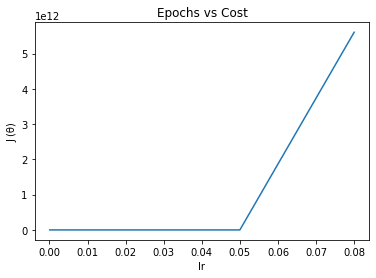

In [47]:
print(alphaa)
print(costarr)


plt.plot(alphaa,costarr)
plt.xlabel('lr')
plt.ylabel("J (θ)")
plt.title("Epochs vs Cost")
plt.show()